In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from diffusers import StableDiffusionPipeline
from utils.dataset_loader import CustomDatasetWithLatent

2025-02-27 19:18:17.865239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset_name = "../latent_files/dataset_with_latents_e2i.pkl"
model_name = "../trained_models/histopathology-diffusion-e2i-256"
device = "cuda:2"
dataset = pickle.load(open(dataset_name, "rb"))
dataset = CustomDatasetWithLatent(dataset)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)

In [4]:
pipeline = StableDiffusionPipeline.from_pretrained(model_name, safety_checker=None)
pipeline = pipeline.to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [5]:
outs = []
for data in data_loader:
    embeddings = data["embedding"]
    embeddings = embeddings
    output = pipeline(
        prompt_embeds=embeddings,
        guidance_scale=0.0,
        num_inference_steps=40
    ).images

    for i in range(len(output)):
        outs.append({
            'generated': output[i]
        })
    
    if len(outs) >= 40:
        break

  0%|          | 0/40 [00:00<?, ?it/s]

In [6]:
print(len(outs))

64


In [ ]:
""" with open("generated_images_e2i.pkl", "wb") as f:
    pickle.dump(outs, f) """

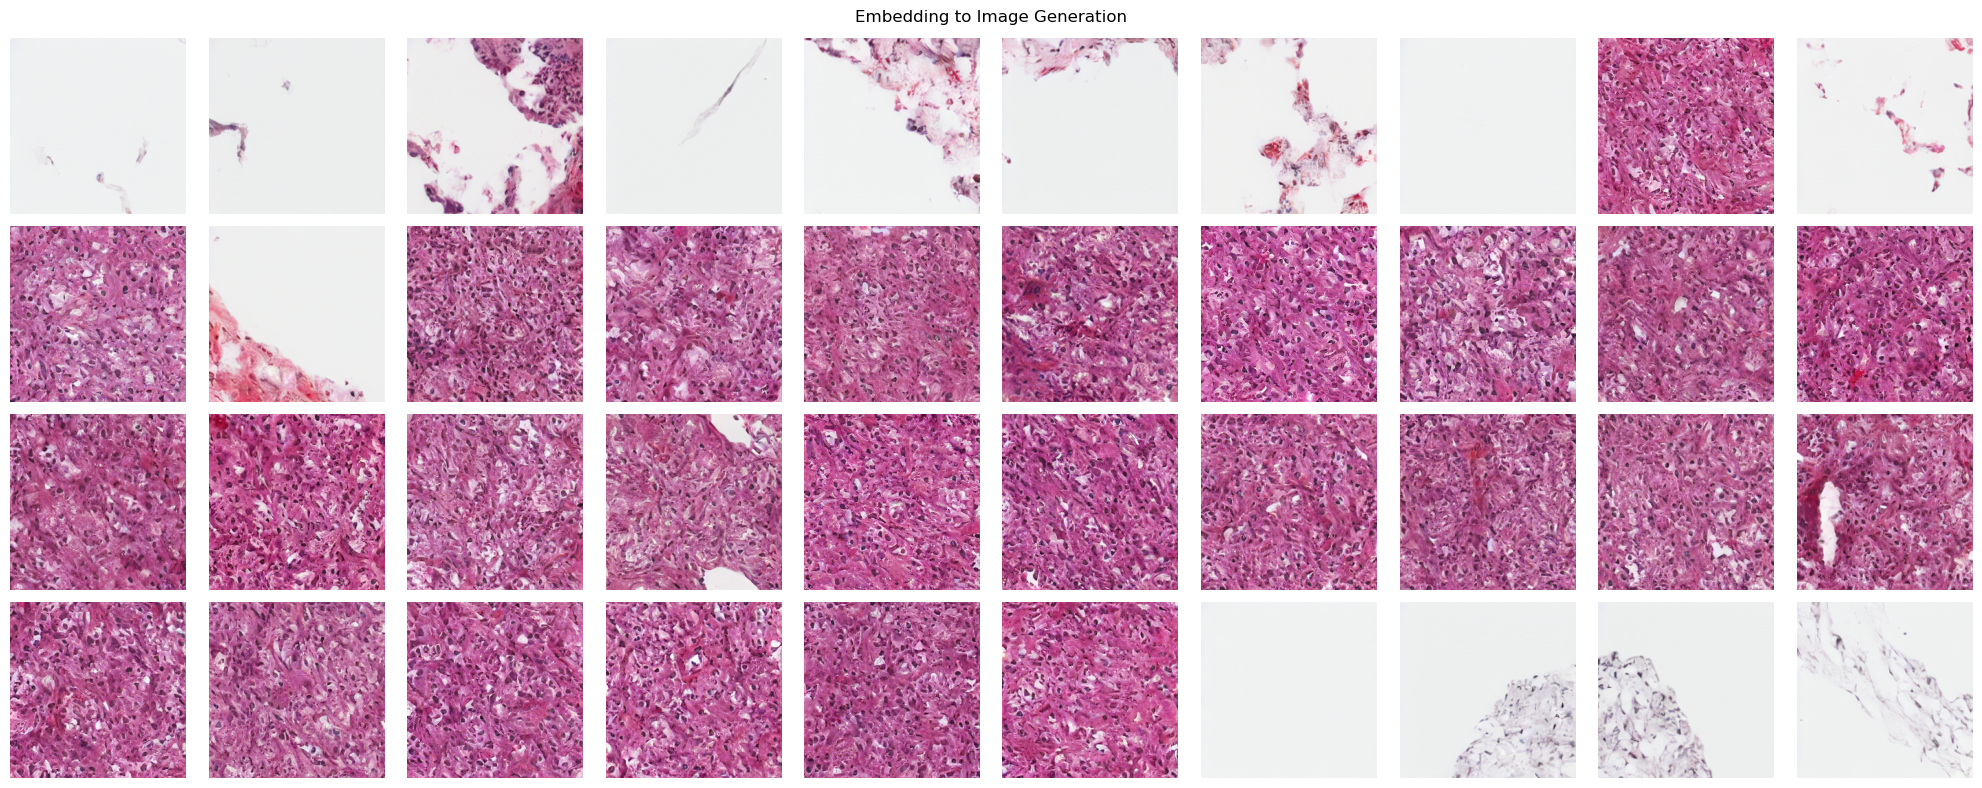

In [7]:
selected_images = 40
fig, axs = plt.subplots(4, 10, figsize=(20, 8))
fig.suptitle('Embedding to Image Generation')

for i in range(selected_images):
    generated = outs[i]['generated']
    axs[i // 10, i % 10].imshow(generated)
    axs[i // 10, i % 10].axis('off')

plt.tight_layout()
plt.show()
fig.savefig("e2i_generated_images.png")